# 1083 Albumin Initial ML

### By: Ian Weimer

In [126]:
import imblearn
print("Imbalanced-Learn", imblearn.__version__)

Imbalanced-Learn 0.7.0


In [127]:
#print("Imbalanced-Learn", imbalanced-learn.__version__)

## Imports

In [128]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import cross_val_score
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
import warnings
from sklearn.compose import make_column_transformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import balanced_accuracy_score
import graphviz
import pydotplus
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, SMOTENC
pd.set_option('display.max_columns', None)

## Load Albumin Data From Pre-processing and Exploratory Analysis

In [129]:
df = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/K70_Cohort/K70_matched.csv')

In [130]:
df.CCI.value_counts()

3     3892
1     2051
4     1968
5     1595
2      915
6      865
7      753
8      434
9      354
10     229
11     103
12      54
13      34
14      21
15      11
16       6
0        2
17       1
Name: CCI, dtype: int64

In [131]:
# drop insignificant vars

#df.drop(columns = ['bed_size', 'Cirrhosis', 'tenant'], inplace=True)

In [132]:
df.head()

encounterid  ICU  Cirrhosis  CCI  qSOFA    MELD  \
0  07ea020e-dbef-418c-b4b2-be3d104ba6be    0          1    2      1  22.000   
1  03255b92-d10f-41fd-8387-9e223f9be912    0          1    3      0  16.574   
2  1dc64909-cbe3-46e2-94ae-7c6de6a38364    0          1   10      0  18.000   
3  47905ac2-9758-4da5-adc5-1349c4c232a9    0          1    2      0  18.000   
4  f0f847d0-a8c0-4d11-b500-110f6f495f1b    0          1    6      0   8.000   

   SEWS  propensity_score  propensity_logit  albumin_24hrs  \
0     2          0.635804          0.557197              1   
1     0          0.390010         -0.447270              1   
2     0          0.591606          0.370610              1   
3     0          0.401814         -0.397912              1   
4     0          0.262973         -1.030574              1   

                               personid   LOS_days  90_day_mortality  \
0  0b195e78-8b4c-4885-a6f1-162738405bf4  13.857639                 0   
1  0c08fc94-32eb-4e48-bd22-f075f911f7cb   5.127778                 0   
2  0d35b91a-883d-43cb-ad15-31123a3008c8  12.054167                 0   
3  14a7cf74-4469-4102-aac3-cdf906baa891   0.278912                 0   
4  16e21cc6-4d8c-44b1-b5e6-206c5f466893   0.307639                 0   

   90_day_readmission  hospital_free_days  albumin_timing  albumin  
0                 0.0                  77             2.0        1  
1                 0.0                  27             1.0        1  
2                 0.0                  78             1.0        1  
3                 0.0                  89             1.0        1  
4                 1.0                   1             1.0        1

In [133]:
df.shape

(13288, 17)

In [134]:
df.propensity_logit.describe()

count    13288.000000
mean         0.754117
std          1.119071
min         -2.543661
25%         -0.052773
50%          0.829157
75%          1.595987
max          3.279804
Name: propensity_logit, dtype: float64

## Add ICU-variable based dataframes

### ICU Cohort

### Non ICU Cohort

## Look at outcomes distributions between patients who did and didn't receive albumin within 24 hrs

In [135]:
m_90d_a24 = df[df['albumin_24hrs'] == 1]['90_day_mortality'].value_counts()
print(m_90d)

0    5482
1    1162
Name: 90_day_mortality, dtype: int64


In [136]:
def binary_pct(var):
    pct = (var[1]/(var[1]+var[0])) * 100
    return pct

binary_pct(m_90d_a24)

26.068633353401566

In [137]:
print((1732/(1732+4912)) * 100)

26.068633353401566


In [138]:
m_90d = df[df['albumin_24hrs'] == 0]['90_day_mortality'].value_counts()
print(m_90d)

0    5482
1    1162
Name: 90_day_mortality, dtype: int64


In [139]:
binary_pct(m_90d)

17.4894641782059

In [140]:
print((1162/(1162 + 5482)) * 100)

17.4894641782059


In [141]:
df.head()

encounterid  ICU  Cirrhosis  CCI  qSOFA    MELD  \
0  07ea020e-dbef-418c-b4b2-be3d104ba6be    0          1    2      1  22.000   
1  03255b92-d10f-41fd-8387-9e223f9be912    0          1    3      0  16.574   
2  1dc64909-cbe3-46e2-94ae-7c6de6a38364    0          1   10      0  18.000   
3  47905ac2-9758-4da5-adc5-1349c4c232a9    0          1    2      0  18.000   
4  f0f847d0-a8c0-4d11-b500-110f6f495f1b    0          1    6      0   8.000   

   SEWS  propensity_score  propensity_logit  albumin_24hrs  \
0     2          0.635804          0.557197              1   
1     0          0.390010         -0.447270              1   
2     0          0.591606          0.370610              1   
3     0          0.401814         -0.397912              1   
4     0          0.262973         -1.030574              1   

                               personid   LOS_days  90_day_mortality  \
0  0b195e78-8b4c-4885-a6f1-162738405bf4  13.857639                 0   
1  0c08fc94-32eb-4e48-bd22-f075f911f7cb   5.127778                 0   
2  0d35b91a-883d-43cb-ad15-31123a3008c8  12.054167                 0   
3  14a7cf74-4469-4102-aac3-cdf906baa891   0.278912                 0   
4  16e21cc6-4d8c-44b1-b5e6-206c5f466893   0.307639                 0   

   90_day_readmission  hospital_free_days  albumin_timing  albumin  
0                 0.0                  77             2.0        1  
1                 0.0                  27             1.0        1  
2                 0.0                  78             1.0        1  
3                 0.0                  89             1.0        1  
4                 1.0                   1             1.0        1

In [142]:
df.drop(columns=['encounterid', 'personid', 'propensity_score', 'propensity_logit', 'albumin', 'albumin_timing'], inplace=True)

In [143]:
df.drop(columns=['90_day_readmission', 'LOS_days', 'hospital_free_days'], inplace=True)

In [144]:
# df.drop(columns=['MELD'], inplace=True)

In [145]:
df.head()

ICU  Cirrhosis  CCI  qSOFA    MELD  SEWS  albumin_24hrs  90_day_mortality
0    0          1    2      1  22.000     2              1                 0
1    0          1    3      0  16.574     0              1                 0
2    0          1   10      0  18.000     0              1                 0
3    0          1    2      0  18.000     0              1                 0
4    0          1    6      0   8.000     0              1                 0

In [146]:
# remove non-baseline variables

# df.drop(columns=['beta_blocker', 'bl_albumin_value', 'SAPS', 'qSOFA'], inplace=True)

In [147]:
df.describe()

ICU     Cirrhosis           CCI         qSOFA          MELD  \
count  13288.000000  13288.000000  13288.000000  13288.000000  13288.000000   
mean       0.217113      0.891180      4.034317      0.698450     24.255708   
std        0.412296      0.311425      2.416956      0.772967      8.535608   
min        0.000000      0.000000      0.000000      0.000000      6.000000   
25%        0.000000      1.000000      3.000000      0.000000     18.376000   
50%        0.000000      1.000000      3.000000      1.000000     24.620000   
75%        0.000000      1.000000      5.000000      1.000000     30.330000   
max        1.000000      1.000000     17.000000      3.000000     40.000000   

               SEWS  albumin_24hrs  90_day_mortality  
count  13288.000000   13288.000000       13288.00000  
mean       1.379741       0.500000           0.21779  
std        1.673190       0.500019           0.41276  
min        0.000000       0.000000           0.00000  
25%        0.000000       0.000000           0.00000  
50%        1.000000       0.500000           0.00000  
75%        2.000000       1.000000           0.00000  
max       12.000000       1.000000           1.00000

In [148]:
#df = df[['CCI', 'unknown_albumin_type', 'albumin_24hrs', '25_percent_albumin', 'LOS_days']]

In [149]:
df['90_day_mortality'].value_counts()

0    10394
1     2894
Name: 90_day_mortality, dtype: int64

In [178]:
df[df['albumin_24hrs'] == 1]['MELD'].describe()

count    6644.000000
mean       24.547835
std         9.084477
min         6.000000
25%        18.000000
50%        24.900000
75%        31.168000
max        40.000000
Name: MELD, dtype: float64

In [179]:
df[df['albumin_24hrs'] == 0]['MELD'].describe()

count    6644.000000
mean       23.963581
std         7.938876
min         6.000000
25%        19.000000
50%        24.528000
75%        29.363000
max        40.000000
Name: MELD, dtype: float64

In [180]:
df[df['albumin_24hrs'] == 1]['CCI'].describe()

count    6644.000000
mean        3.998946
std         2.292380
min         1.000000
25%         3.000000
50%         3.000000
75%         5.000000
max        17.000000
Name: CCI, dtype: float64

In [181]:
df[df['albumin_24hrs'] == 0]['CCI'].describe()

count    6644.000000
mean        4.069687
std         2.535099
min         0.000000
25%         3.000000
50%         3.000000
75%         5.000000
max        16.000000
Name: CCI, dtype: float64

## Modeling

In [152]:
# establish target feature, LOS_days, as y feature
y = df['90_day_mortality']
# drop target feature from features dataframe
X = df.drop(columns = ['90_day_mortality'], axis = 1)
# save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [153]:
cols

Index(['ICU', 'Cirrhosis', 'CCI', 'qSOFA', 'MELD', 'SEWS', 'albumin_24hrs'], dtype='object')

## Standardize Data

In [154]:
#cols = X.columns

#instantiate min-max scaling object
#mm = MinMaxScaler()
# fit and transform feature dataframe
#X = pd.DataFrame(mm.fit_transform(X))
# reassign column names so new dataframe has corresponding names
#X.columns = cols

In [155]:
X.head()

ICU  Cirrhosis  CCI  qSOFA    MELD  SEWS  albumin_24hrs
0    0          1    2      1  22.000     2              1
1    0          1    3      0  16.574     0              1
2    0          1   10      0  18.000     0              1
3    0          1    2      0  18.000     0              1
4    0          1    6      0   8.000     0              1

In [156]:
X.shape

(13288, 7)

## Train Test Split

In [157]:
sm = SMOTENC(random_state=42, categorical_features = [0, 1, 3, \
                                                     5, 6])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [104]:
sm = SMOTENC(random_state=42, categorical_features = [0, 1, 3, \
                                                     4, 5])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [105]:
#sm = SMOTEN(random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train = sm.fit_resample(X_train, y_train)

In [158]:
# what tree uses in flowchart

y_train.value_counts()

0    8317
1    8317
Name: 90_day_mortality, dtype: int64

In [159]:
# train test split from target feature series and the predicting feature dataframe (set test size to 20% of data)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 33)

## Multinomial Logistic Regression

In [160]:
# instantiate a Logistic Regression model without an intercept, 'liblinear' solver method
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model to X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

Feature: ICU Score: 0.34255
Feature: Cirrhosis Score: 0.22719
Feature: CCI Score: 0.04102
Feature: qSOFA Score: 0.18283
Feature: MELD Score: 0.03394
Feature: SEWS Score: 0.04010
Feature: albumin_24hrs Score: 0.27550


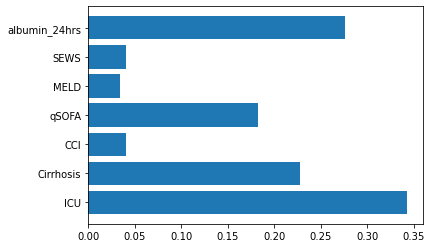

In [161]:
# general quick feature importance
# get coefficients for importance
# coefficients represent the log odds that an observation is in the
# target class, given the values of its X variables

importance = logreg.coef_[0]
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

               Importance
ICU              1.408535
albumin_24hrs    1.317190
Cirrhosis        1.255070
qSOFA            1.200608
CCI              1.041877
SEWS             1.040914
MELD             1.034527


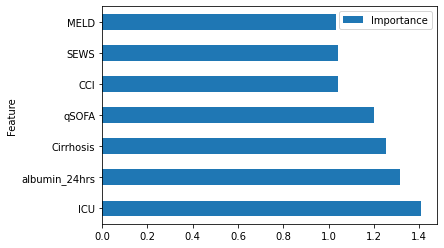

In [162]:
# convert log odds into regular odds with exponentiation
# np.exp()
# and list values, visualize in bar plot

odds = np.exp(logreg.coef_[0])
feature_importance = \
            pd.DataFrame(odds, 
             X.columns, 
             columns=['Importance'])\
            .sort_values(by='Importance', ascending=False)
        
ax = feature_importance.plot.barh(xlabel='Feature', ylabel='Importance')
print(feature_importance)
plt.show()

In [163]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [164]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[5570 2747]
 [2839 5478]]


In [165]:
# model metrics for training set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.66      0.67      0.67      8317
           1       0.67      0.66      0.66      8317

    accuracy                           0.66     16634
   macro avg       0.66      0.66      0.66     16634
weighted avg       0.66      0.66      0.66     16634



In [166]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1385  692]
 [ 197  384]]


In [167]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76      2077
           1       0.36      0.66      0.46       581

    accuracy                           0.67      2658
   macro avg       0.62      0.66      0.61      2658
weighted avg       0.76      0.67      0.69      2658



## 1: Decision Tree (Max Depth=3)

In [168]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=3)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Feature: ICU Score: 0.18264
Feature: Cirrhosis Score: 0.00000
Feature: CCI Score: 0.00000
Feature: qSOFA Score: 0.09448
Feature: MELD Score: 0.70285
Feature: SEWS Score: 0.00000
Feature: albumin_24hrs Score: 0.02004


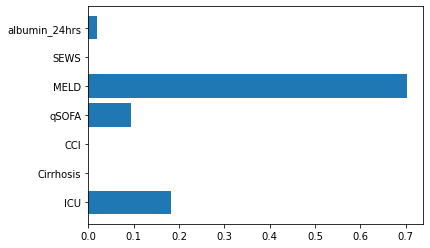

In [52]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [53]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [54]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[6261 2043]
 [3788 4516]]


In [55]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68      8304
           1       0.69      0.54      0.61      8304

    accuracy                           0.65     16608
   macro avg       0.66      0.65      0.64     16608
weighted avg       0.66      0.65      0.64     16608



In [56]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1547  543]
 [ 259  309]]


In [57]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79      2090
           1       0.36      0.54      0.44       568

    accuracy                           0.70      2658
   macro avg       0.61      0.64      0.61      2658
weighted avg       0.75      0.70      0.72      2658



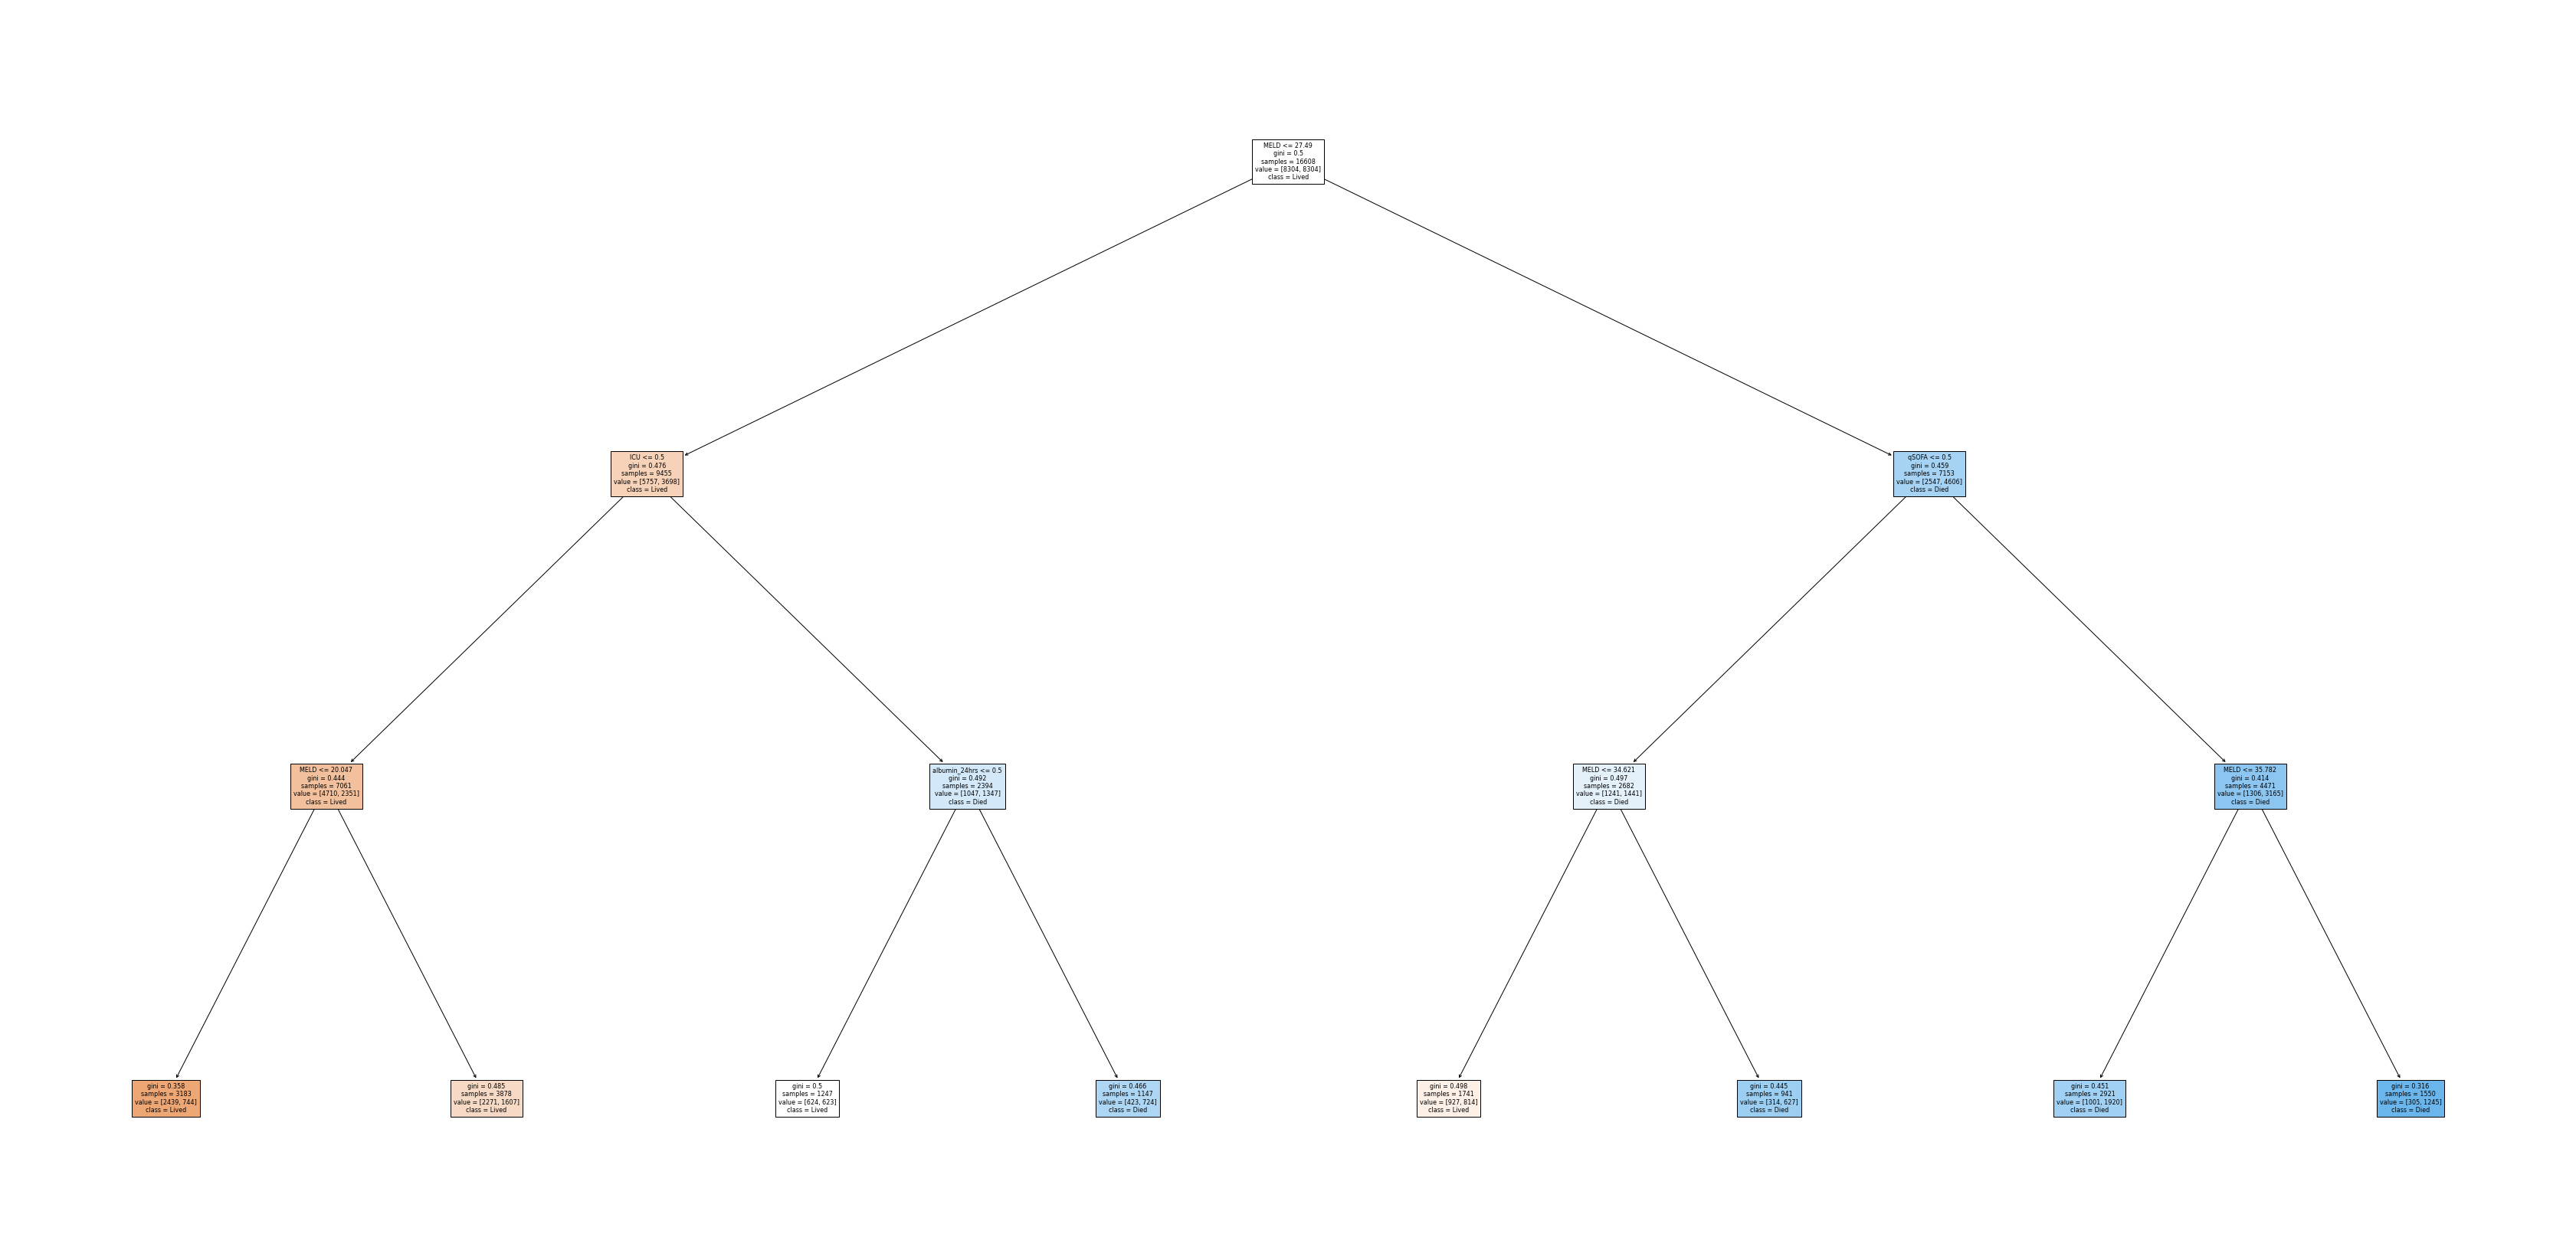

In [58]:
feature_names = X_train.columns.tolist()
class_names = ['Lived', 'Died']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [186]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('90DM_DT_D3_NCBL_MATCHED.png')

True

## 2: Decision Tree (Max Depth=4)

In [18]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=4)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [19]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [20]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

NameError: name 'X_train' is not defined

In [190]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[3828 3006]
 [2640 4194]]


In [191]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.59      0.56      0.58      6834
           1       0.58      0.61      0.60      6834

    accuracy                           0.59     13668
   macro avg       0.59      0.59      0.59     13668
weighted avg       0.59      0.59      0.59     13668



In [192]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[930 791]
 [136 221]]


In [193]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.87      0.54      0.67      1721
           1       0.22      0.62      0.32       357

    accuracy                           0.55      2078
   macro avg       0.55      0.58      0.50      2078
weighted avg       0.76      0.55      0.61      2078



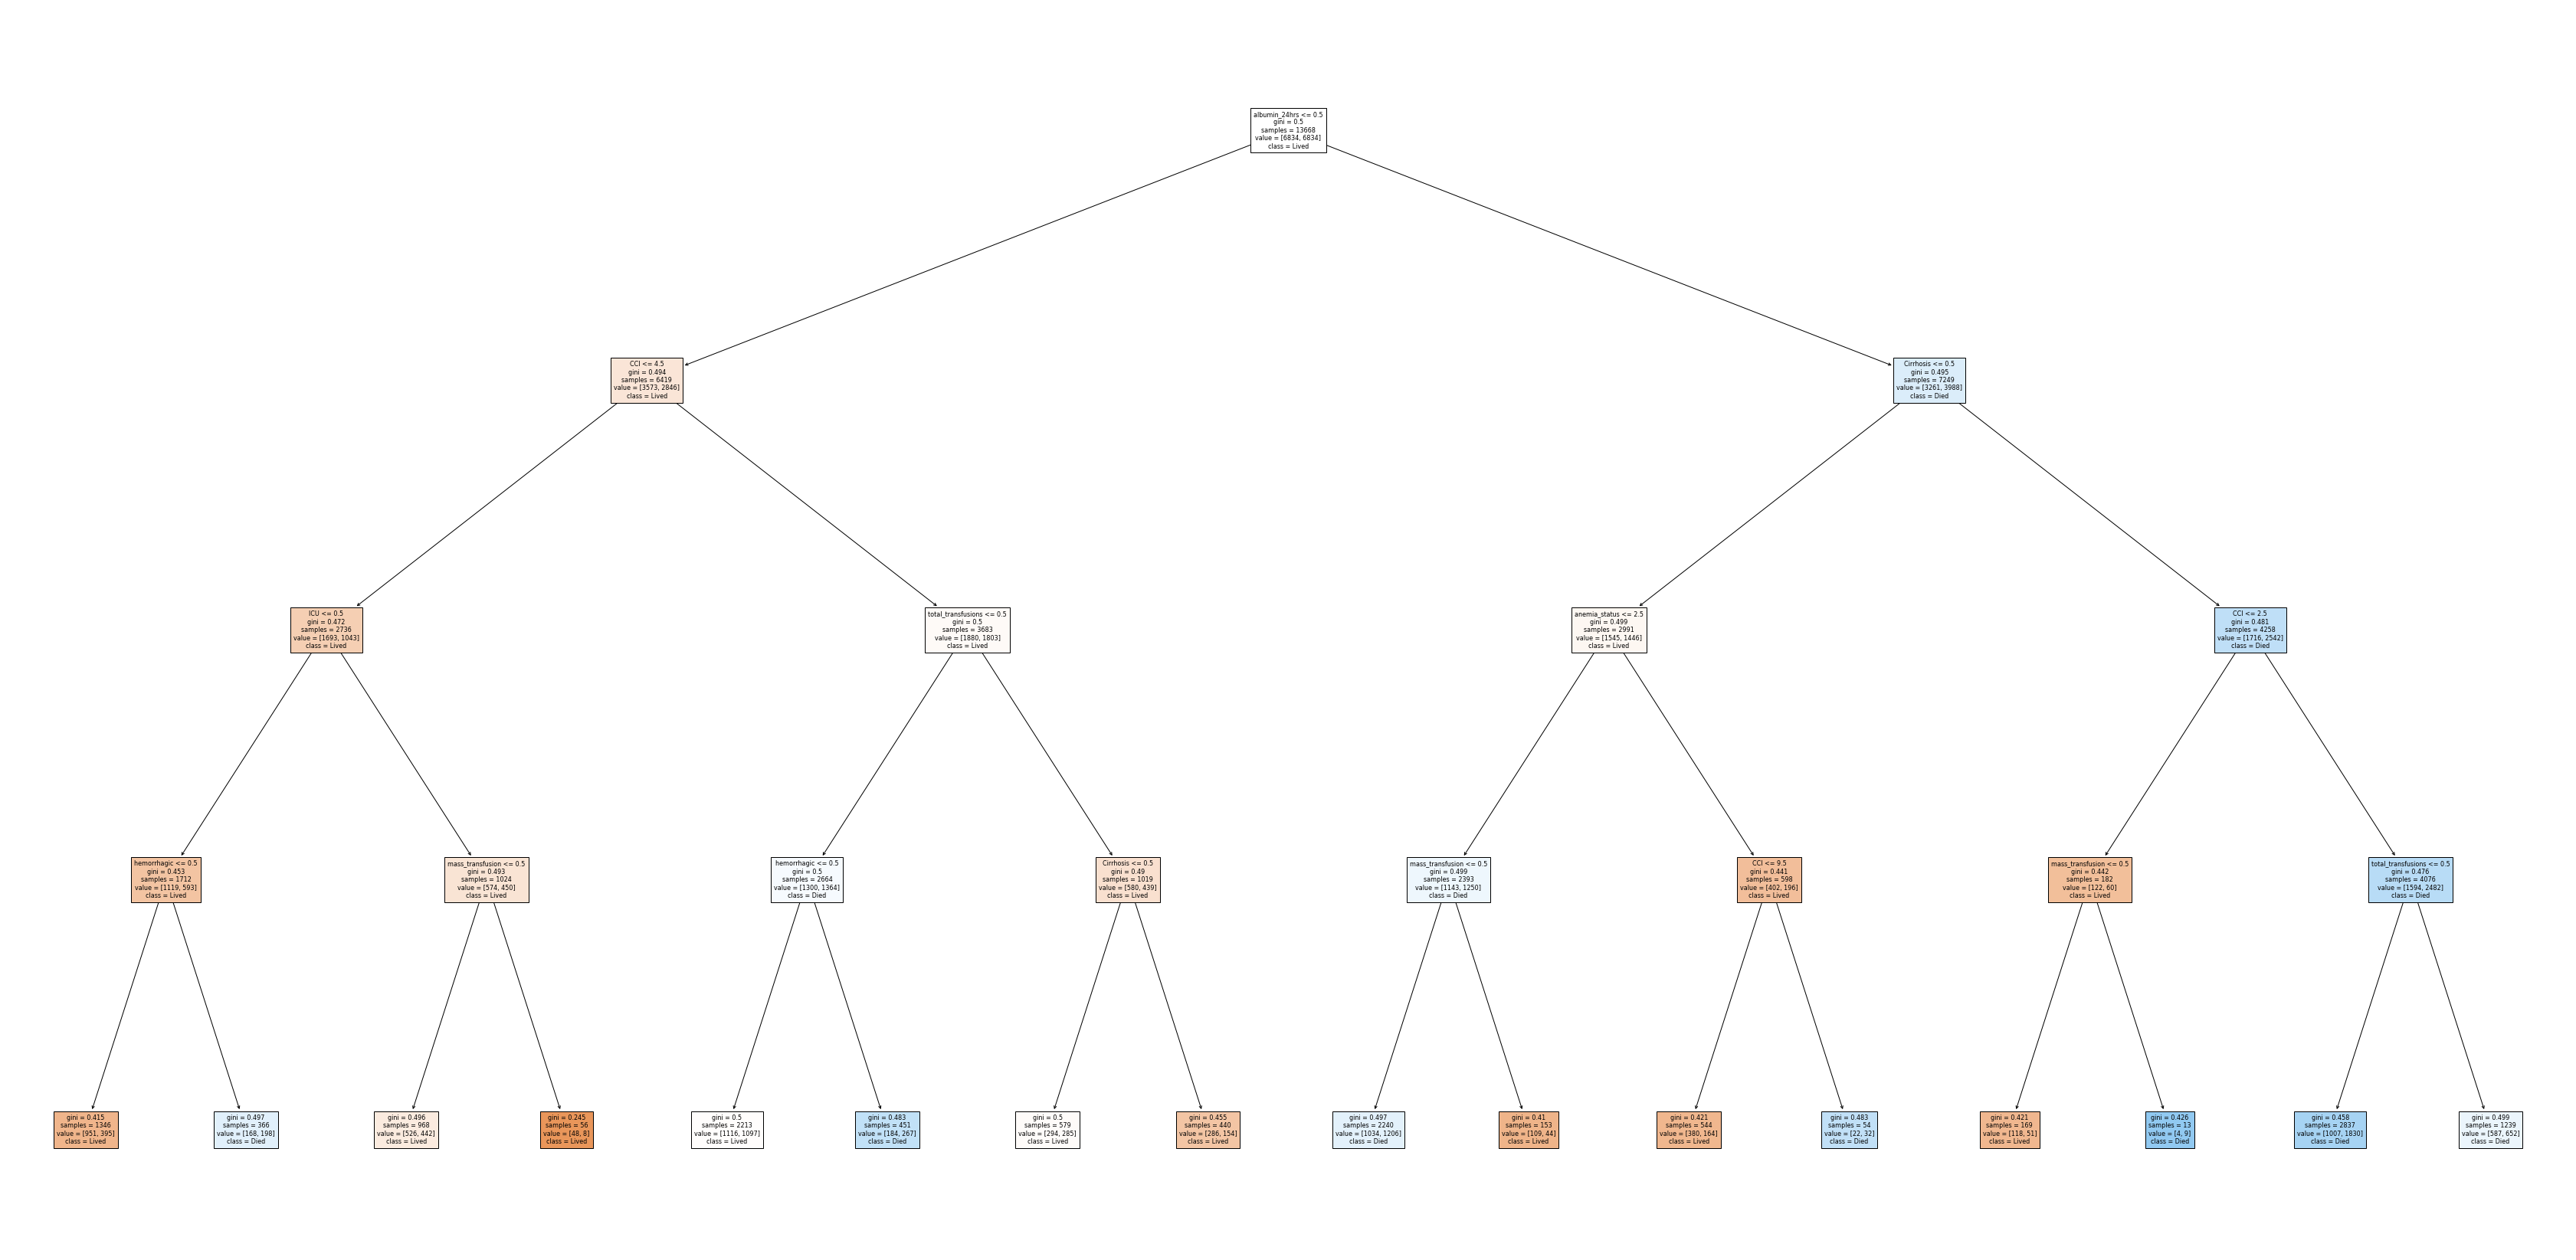

In [194]:
feature_names = X_train.columns.tolist()
class_names = ['Lived', 'Died']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [195]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('90DM_DT_D4_NCBL_MATCHED.png')

True

## 3: Decision Tree 

In [196]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100)

Feature: ICU Score: 0.13735
Feature: mass_transfusion Score: 0.03941
Feature: total_transfusions Score: 0.11500
Feature: anemia_status Score: 0.10785
Feature: CCI Score: 0.16236
Feature: Cirrhosis Score: 0.12856
Feature: hemorrhagic Score: 0.13971
Feature: albumin_24hrs Score: 0.16977


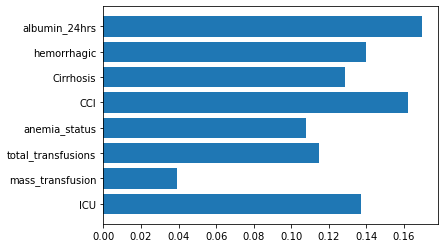

In [197]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [198]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [199]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[3719 3115]
 [2290 4544]]


In [200]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.62      0.54      0.58      6834
           1       0.59      0.66      0.63      6834

    accuracy                           0.60     13668
   macro avg       0.61      0.60      0.60     13668
weighted avg       0.61      0.60      0.60     13668



In [201]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[908 813]
 [136 221]]


In [202]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.87      0.53      0.66      1721
           1       0.21      0.62      0.32       357

    accuracy                           0.54      2078
   macro avg       0.54      0.57      0.49      2078
weighted avg       0.76      0.54      0.60      2078



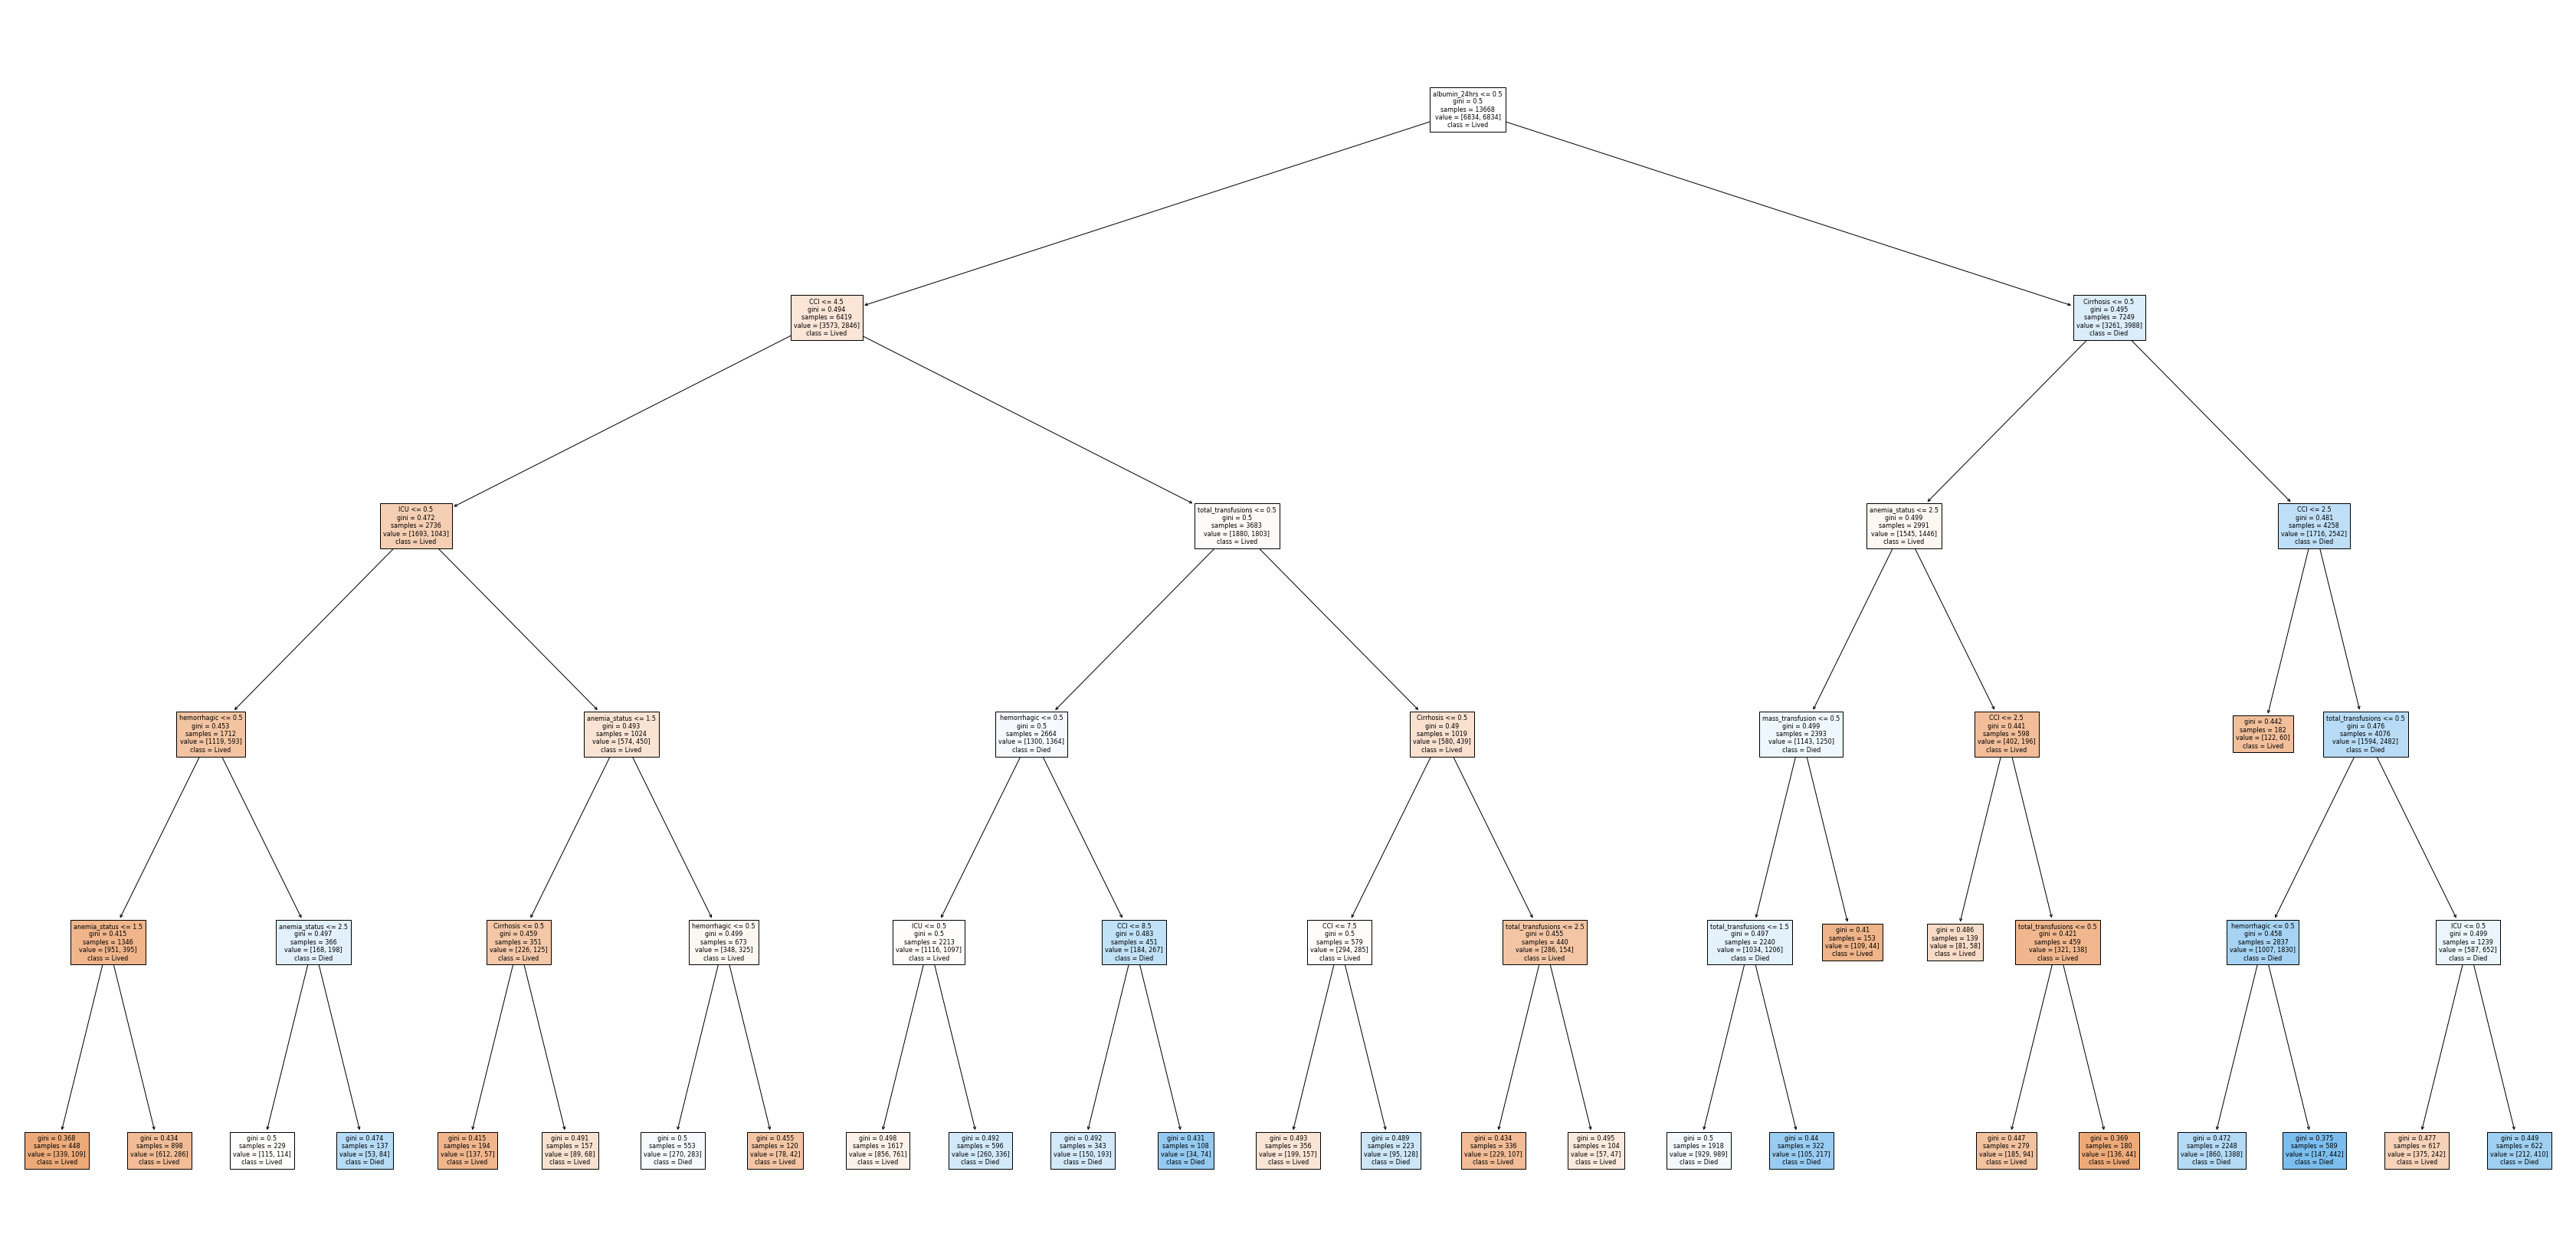

In [203]:
feature_names = X_train.columns.tolist()
class_names = ['Lived', 'Died']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [204]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('90DM_DT_D5_NCBL_MATCHED.png')

True

## 4: Decision Tree 

In [205]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=6, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=100)

Feature: ICU Score: 0.14829
Feature: mass_transfusion Score: 0.03323
Feature: total_transfusions Score: 0.16509
Feature: anemia_status Score: 0.12680
Feature: CCI Score: 0.14840
Feature: Cirrhosis Score: 0.11725
Feature: hemorrhagic Score: 0.11780
Feature: albumin_24hrs Score: 0.14314


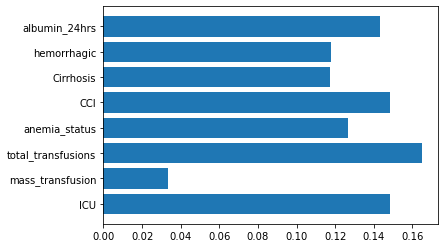

In [206]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [207]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [208]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[4312 2522]
 [2725 4109]]


In [209]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.61      0.63      0.62      6834
           1       0.62      0.60      0.61      6834

    accuracy                           0.62     13668
   macro avg       0.62      0.62      0.62     13668
weighted avg       0.62      0.62      0.62     13668



In [210]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1060  661]
 [ 163  194]]


In [211]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.87      0.62      0.72      1721
           1       0.23      0.54      0.32       357

    accuracy                           0.60      2078
   macro avg       0.55      0.58      0.52      2078
weighted avg       0.76      0.60      0.65      2078



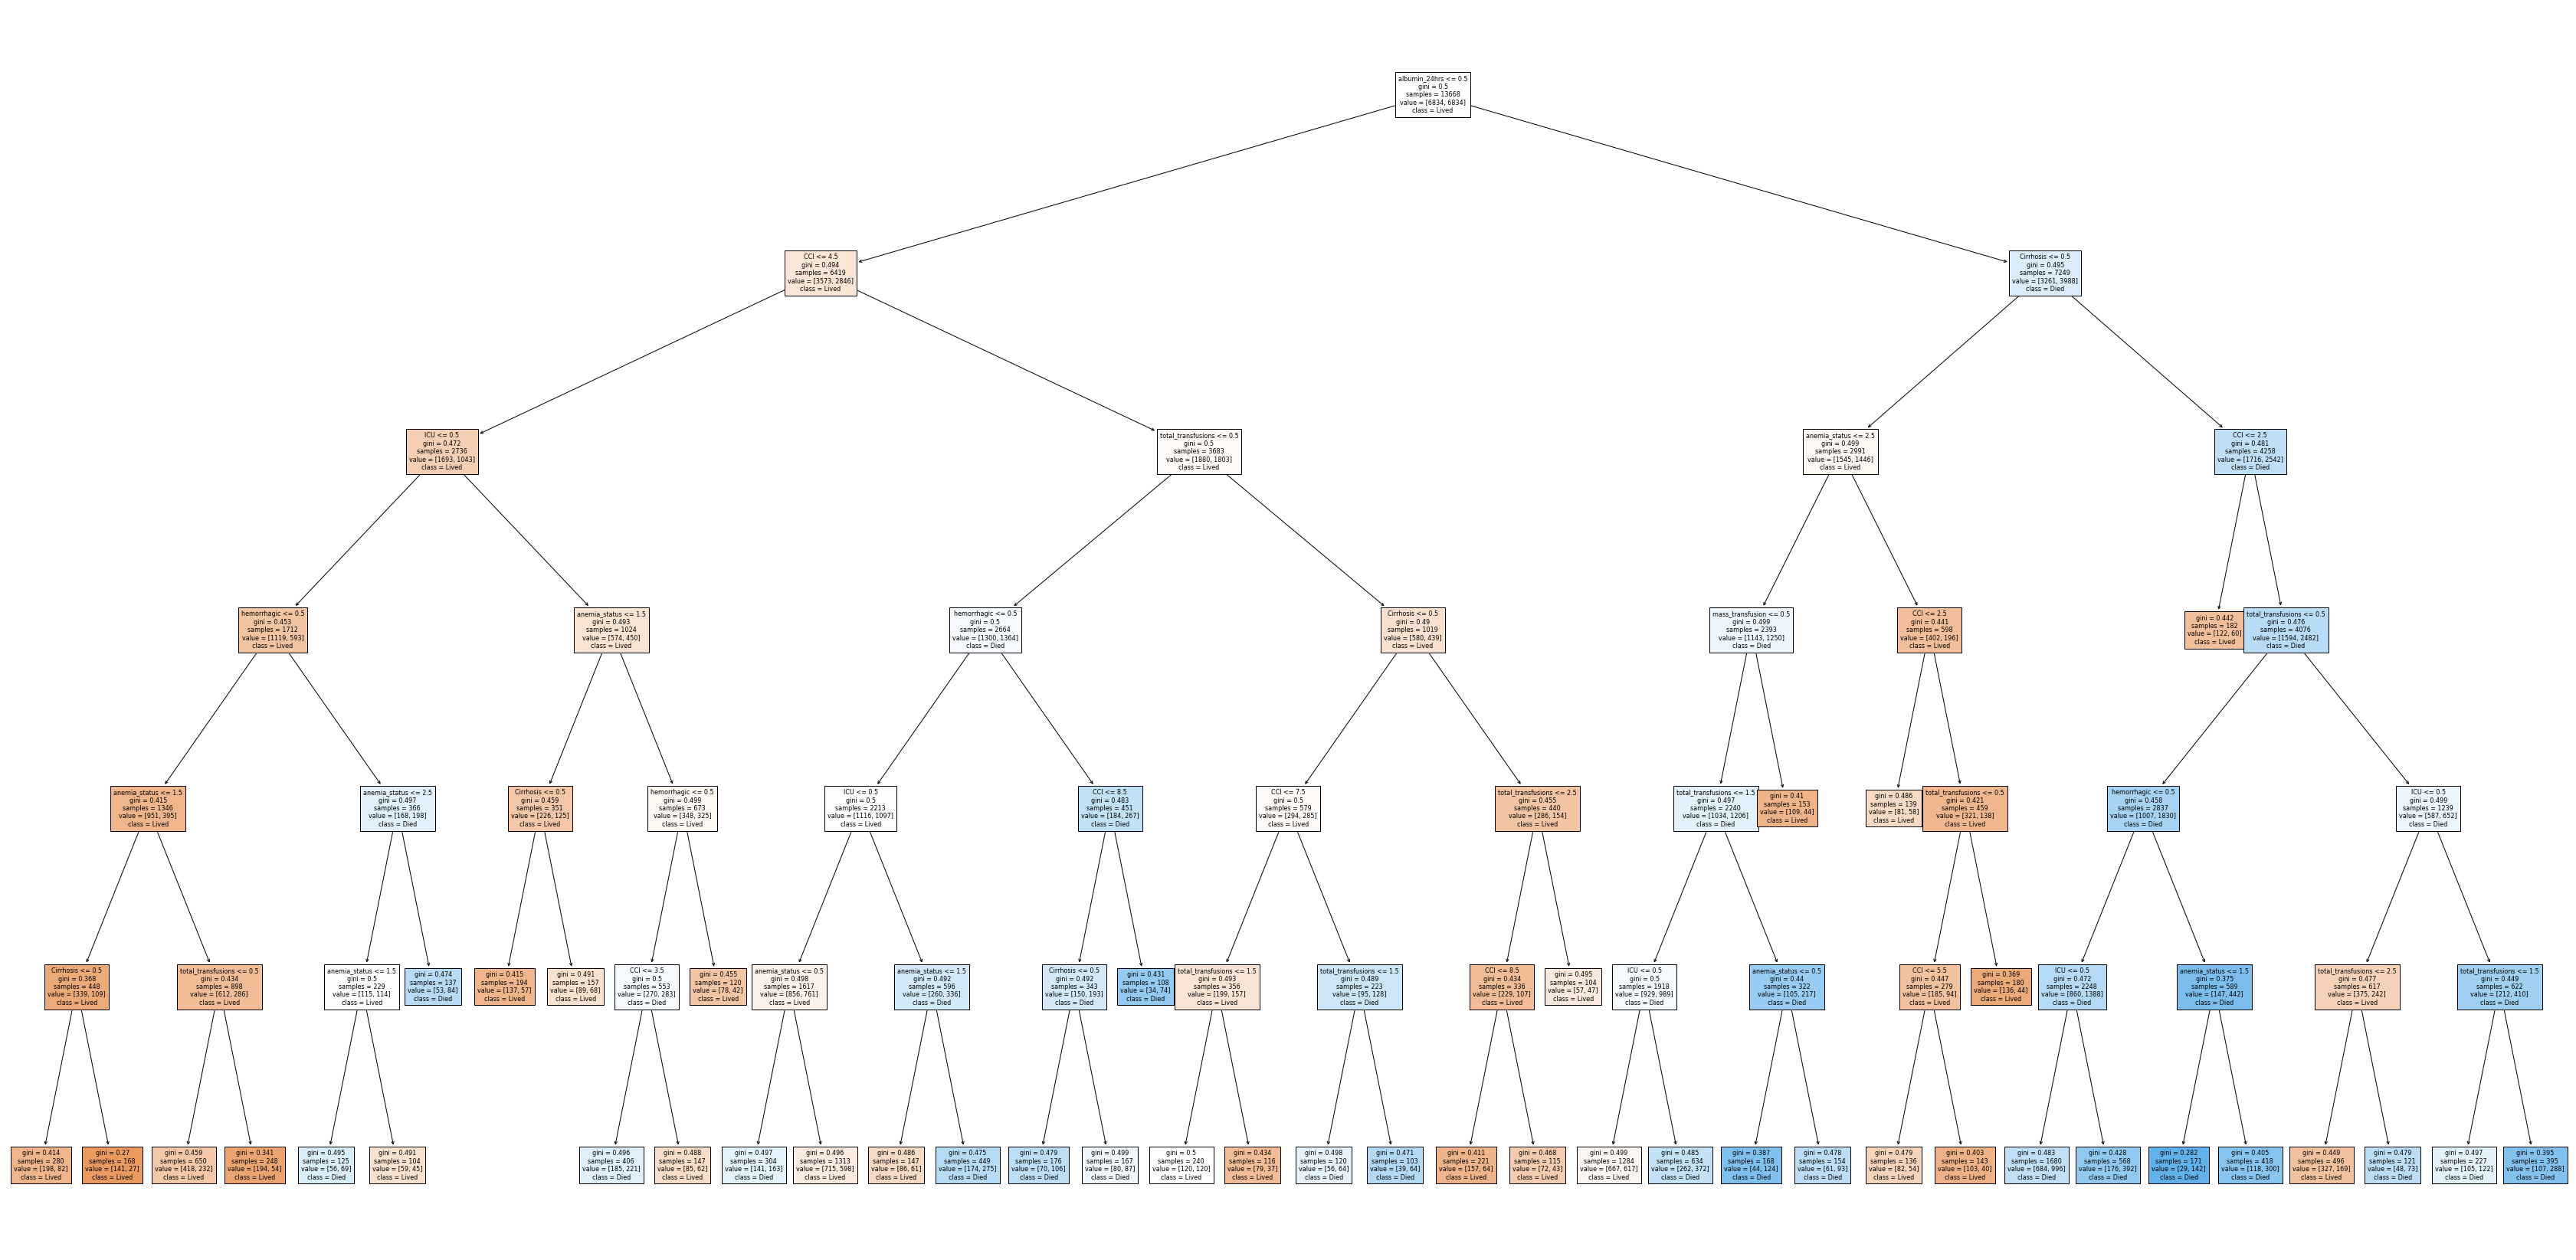

In [212]:
feature_names = X_train.columns.tolist()
class_names = ['Lived', 'Died']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [213]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('90DM_DT_D6_NCBL_MATCHED.png')

True

## 5: Decision Tree 

In [169]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)

Feature: ICU Score: 0.10019
Feature: Cirrhosis Score: 0.00385
Feature: CCI Score: 0.08791
Feature: qSOFA Score: 0.19372
Feature: MELD Score: 0.48491
Feature: SEWS Score: 0.05478
Feature: albumin_24hrs Score: 0.07464


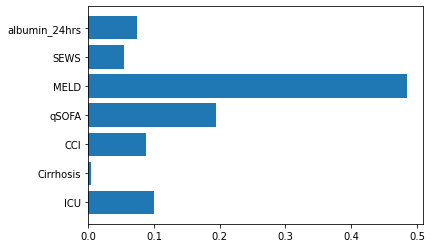

In [170]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [171]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [172]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[5787 2530]
 [2721 5596]]


In [173]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      8317
           1       0.69      0.67      0.68      8317

    accuracy                           0.68     16634
   macro avg       0.68      0.68      0.68     16634
weighted avg       0.68      0.68      0.68     16634



In [174]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1434  643]
 [ 233  348]]


In [175]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77      2077
           1       0.35      0.60      0.44       581

    accuracy                           0.67      2658
   macro avg       0.61      0.64      0.60      2658
weighted avg       0.75      0.67      0.70      2658



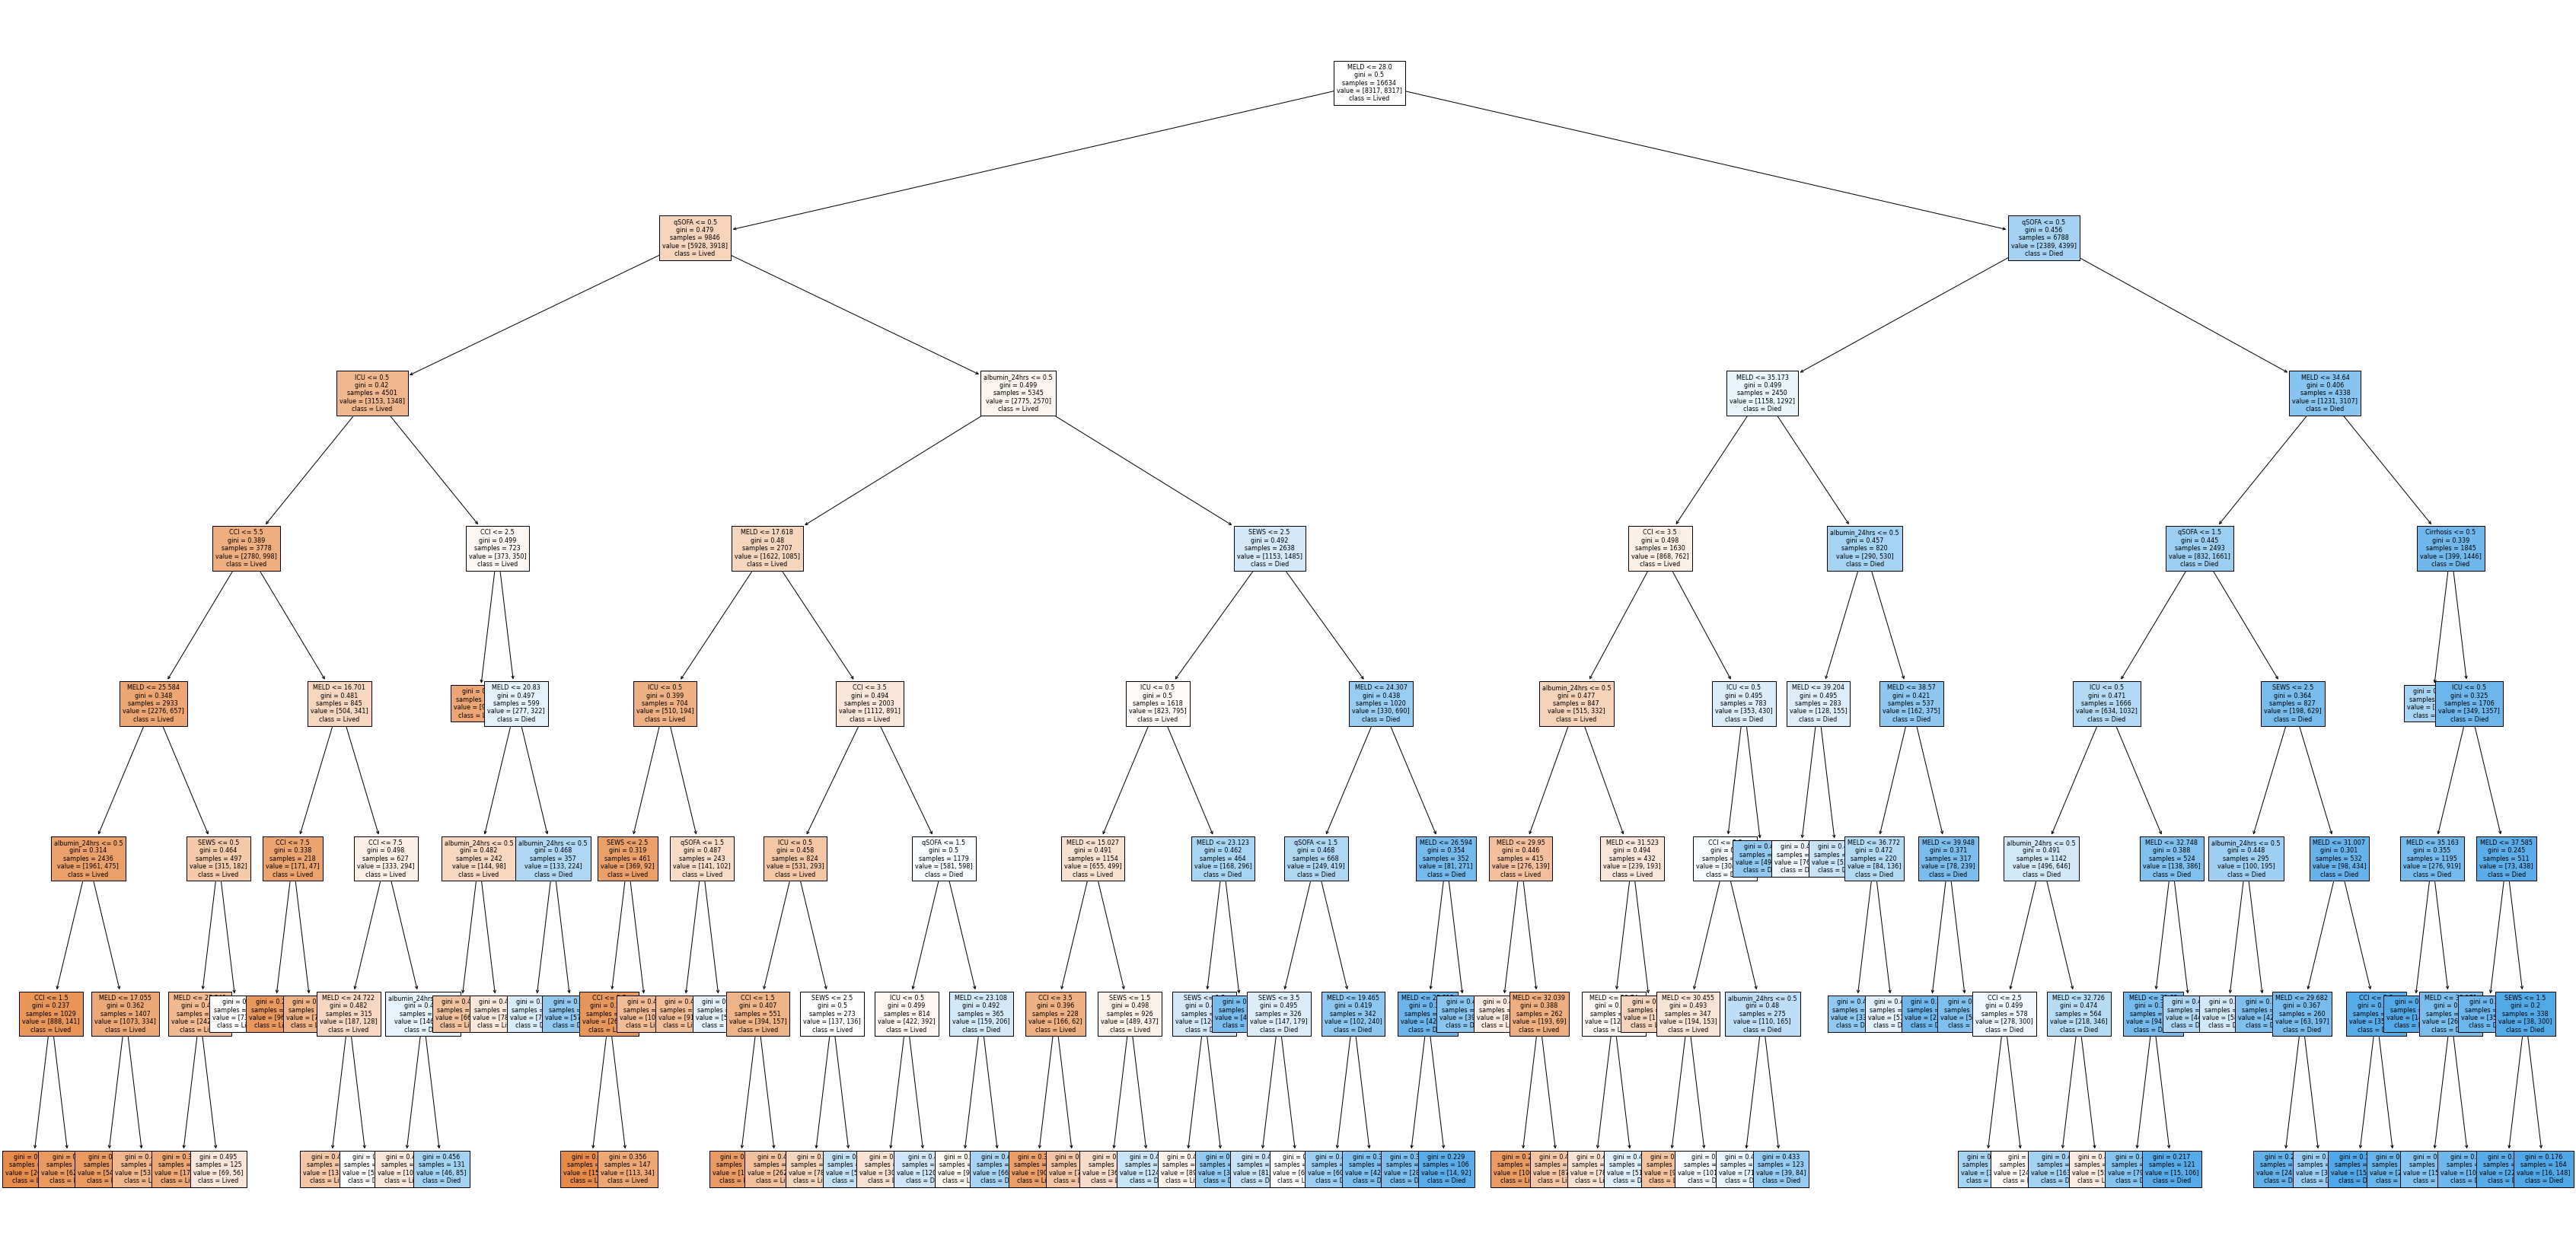

In [176]:
feature_names = X_train.columns.tolist()
class_names = ['Lived', 'Died']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [177]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('90DM_DT_D7_NCBL_MATCHED.png')

True

## Random Forest

In [223]:
rf = RandomForestClassifier(max_depth=8, min_samples_leaf=100)
# fit the model to X and y training sets
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=100)

In [224]:
# generate model prediction data for train and test sets
y_hat_train = rf.predict(X_train)
y_hat_test = rf.predict(X_test)

In [225]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[4497 2337]
 [2907 3927]]


In [226]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.61      0.66      0.63      6834
           1       0.63      0.57      0.60      6834

    accuracy                           0.62     13668
   macro avg       0.62      0.62      0.62     13668
weighted avg       0.62      0.62      0.62     13668



In [227]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1096  625]
 [ 160  197]]


In [228]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.87      0.64      0.74      1721
           1       0.24      0.55      0.33       357

    accuracy                           0.62      2078
   macro avg       0.56      0.59      0.54      2078
weighted avg       0.76      0.62      0.67      2078



Feature: ICU Score: 0.13846
Feature: mass_transfusion Score: 0.00615
Feature: total_transfusions Score: 0.15328
Feature: anemia_status Score: 0.10212
Feature: CCI Score: 0.19898
Feature: Cirrhosis Score: 0.09376
Feature: hemorrhagic Score: 0.08319
Feature: albumin_24hrs Score: 0.22406


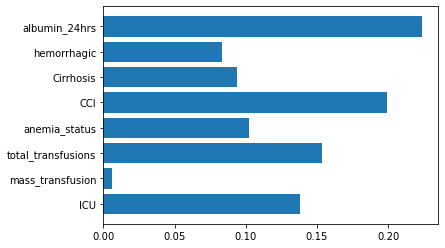

In [229]:
# get importance from decision tree model
importance = rf.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()